In [2]:
import numpy as np
import pandas as pd
import material as ml
import thinfilm as tm
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution, minimize

wl = np.linspace(400, 700, 301)
R_scan = pd.read_csv('./spectrum/LENS/rev1/R_5_B.csv')['SCAN'].values
R_tap = pd.read_csv('./spectrum/R_tap.csv')

air = ml.Non_Dispersion(1)

ITO_L = ml.open_material('ITO_LENS', 'Sellmeier') 
OC = ml.open_material('OC_LENS', 'Material')
HOC = ml.open_material('OC_HRI_LENS', 'Material')
sodalime = ml.open_material('sodalime', 'Material')
ITO = ml.Cauchy([1.640727, 0.050604], ITO_L.k, ITO_L.wl_k)
SiN = ml.Cauchy([1.97812451, 0.0100578])
SiO2 = ml.Cauchy([1.50818418, 0.00141496727])
sodalime_LENS = ml.Non_Dispersion(1.65)
                
R_hypo = lambda th: tm.Design(
    [air, OC, SiN, SiO2, ITO, SiO2, SiN, sodalime],
    [None, th[0], th[1], th[2], th[3], th[4], th[5], None]
).reflectance(wl, 5)

R_hypo_tra = lambda th: tm.Design(
    [air, OC, SiN, SiO2, SiO2, SiN, sodalime_LENS],
    [None, th[0], th[1], th[2], th[4], th[5], None]
).reflectance(wl, 5)


SEM = lambda th: abs(th[1]+th[2]-52.5)+abs(th[4]+th[5]-53.6)
IM =lambda th: sum(abs(R_hypo(th)-R_hypo_tra(th)))
FOM = lambda th: 10*np.mean(abs(100*R_hypo(th)-R_scan)) #+ SEM(th)

In [3]:
sol = differential_evolution(
    FOM, [
        (1500,2500), # O.C
        (5,20), # T SiN
        (30,55), # T SiO2
        (26,30), # ITO
        (30,55), # B SiN
        (5,20), # B SiO2
    ], disp = True, polish = False, popsize = 15, mutation = 0.3, recombination = 0.9, strategy = 'rand1exp'
)
print(sol.x)

differential_evolution step 1: f(x)= 6.62768
differential_evolution step 2: f(x)= 6.0478
differential_evolution step 3: f(x)= 6.0478
differential_evolution step 4: f(x)= 5.53906
differential_evolution step 5: f(x)= 5.26795
differential_evolution step 6: f(x)= 5.11702
differential_evolution step 7: f(x)= 4.25728
differential_evolution step 8: f(x)= 3.68908
differential_evolution step 9: f(x)= 3.68908
differential_evolution step 10: f(x)= 3.68908
differential_evolution step 11: f(x)= 3.68908
differential_evolution step 12: f(x)= 3.68908
differential_evolution step 13: f(x)= 3.05141
differential_evolution step 14: f(x)= 3.05141
differential_evolution step 15: f(x)= 3.05141
differential_evolution step 16: f(x)= 3.05141
differential_evolution step 17: f(x)= 3.05141
differential_evolution step 18: f(x)= 3.05141
differential_evolution step 19: f(x)= 3.05141
differential_evolution step 20: f(x)= 3.05141
differential_evolution step 21: f(x)= 3.05141
differential_evolution step 22: f(x)= 3.02807

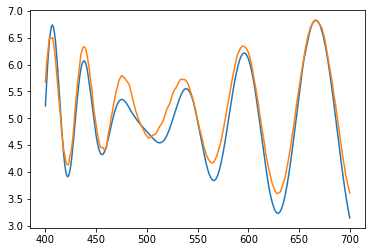

In [7]:
plt.plot(wl, 100*R_hypo(sol.x))
plt.plot(wl, R_scan)
#plt.plot(wl, 100*R_hypo_tra(sol.x))
plt.show()

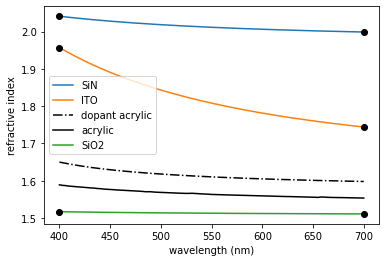

In [3]:
plt.plot(wl, SiN.nvalues(wl), label = 'SiN')
plt.plot(400,SiN.nvalues(400),'ko')
plt.plot(700,SiN.nvalues(700),'ko')
plt.plot(wl, ITO.nvalues(wl), label = 'ITO')
plt.plot(400,ITO.nvalues(400),'ko')
plt.plot(700,ITO.nvalues(700),'ko')
plt.plot(wl, HOC.nvalues(wl), '-.k',label = 'dopant acrylic')
plt.plot(wl, OC.nvalues(wl), '-k',label = 'acrylic')
plt.plot(wl, SiO2.nvalues(wl), label = 'SiO2')
plt.plot(400,SiO2.nvalues(400),'ko')
plt.plot(700,SiO2.nvalues(700),'ko')
plt.xlabel('wavelength (nm)')
plt.ylabel('refractive index')
plt.legend(loc = 'best')
#plt.savefig('LENS_material.png')
plt.show()

In [20]:

print((OC.nvalues(700)-OC.nvalues(400))/0.3)
print(ITO.nvalues(550))

-0.11800823995820868
1.8080129504132232
